# DATA ANALYSIS AND VISUALIZATION FILE
This file is for data analysis and visualization of the data. the data is imported from 'loading_data.ipynb', so make sure the data preprocessing is working correctly within that notebook.

In [1]:
import os
import pandas as pd
import seaborn as sns
from src.loading_functions import load_or_download_lego_data,preprocess_data
import requests
import matplotlib.pyplot as plt

In [2]:
#get cwd
cwd = os.getcwd()
#get data folder
data_folder = os.path.join(cwd, 'data')

In [3]:
#load or download lego data
dfall = load_or_download_lego_data(data_folder) #check if you have dependencies installed. else run first cell
df = preprocess_data(dfall,include_monthly=False)
dft= preprocess_data(dfall,include_monthly=True)

Loading data from c:\Users\viviK\Documents\GitHub\Lego projectfinal\MarcusGalea.github.io\data\lego_sets.csv


c:\Users\viviK\Documents\GitHub\Lego projectfinal\MarcusGalea.github.io\src\loading_functions.py:10: DtypeWarning: Columns (34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(data_folder, 'lego_sets.csv'))
c:\Users\viviK\Documents\GitHub\Lego projectfinal\MarcusGalea.github.io\src\loading_functions.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df.columns[date_columns]] = df[df.columns[date_columns]].applymap(lambda x: x.split("T")[0])
c:\Users\viviK\Documents\GitHub\Lego projectfinal\MarcusGalea.github.io\src\loading_functions.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df.columns[date_columns]] = df[df.columns[date_columns]].applymap(lambda x: x.split("T")[0])


In [4]:
df.columns

Index(['setID', 'number', 'numberVariant', 'name', 'year', 'theme',
       'themeGroup', 'subtheme', 'category', 'released', 'pieces', 'minifigs',
       'ownedBy', 'wantedBy', 'rating', 'reviewCount', 'packagingType',
       'availability', 'instructionsCount', 'minAge', 'maxAge', 'tags',
       'lastUpdated', 'urlRetailPriceCheckPLN', 'US_retailPrice',
       'US_dateFirstAvailable', 'US_dateLastAvailable', 'UK_retailPrice',
       'UK_dateFirstAvailable', 'UK_dateLastAvailable', 'CA_retailPrice',
       'CA_dateFirstAvailable', 'CA_dateLastAvailable', 'DE_retailPrice',
       'DE_dateFirstAvailable', 'DE_dateLastAvailable', 'PL_retailPrice',
       'Date', 'status'],
      dtype='object')

In [5]:
#Get the interesting columns of the dataset
countries = ["US", "UK", "CA", "DE", "PL"]
conversion_to_euro = {"US": 0.85, "UK": 1.17, "CA": 0.68, "PL": 0.23, "DE": 1}
retail_price_columns = [country + "_retail_price" for country in countries]
#date columns
date_columns = ["date" in column for column in df.columns]
df.columns[date_columns]

Index(['lastUpdated', 'US_dateFirstAvailable', 'US_dateLastAvailable',
       'UK_dateFirstAvailable', 'UK_dateLastAvailable',
       'CA_dateFirstAvailable', 'CA_dateLastAvailable',
       'DE_dateFirstAvailable', 'DE_dateLastAvailable'],
      dtype='object')

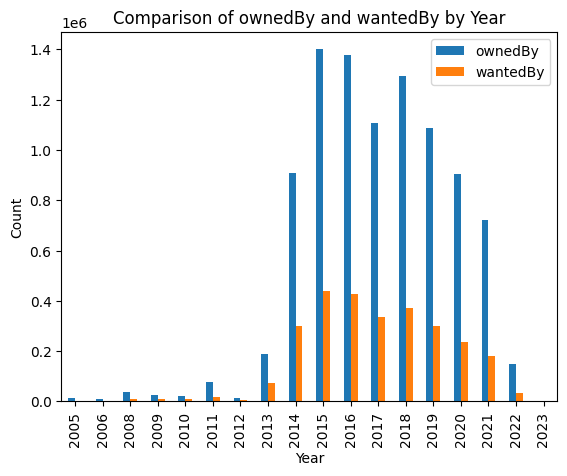

In [6]:
# Group by 'year' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = df.groupby('year')[['ownedBy', 'wantedBy']].sum()

# Plot
grouped_df.plot(kind='bar', stacked=False)
plt.title('Comparison of ownedBy and wantedBy by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

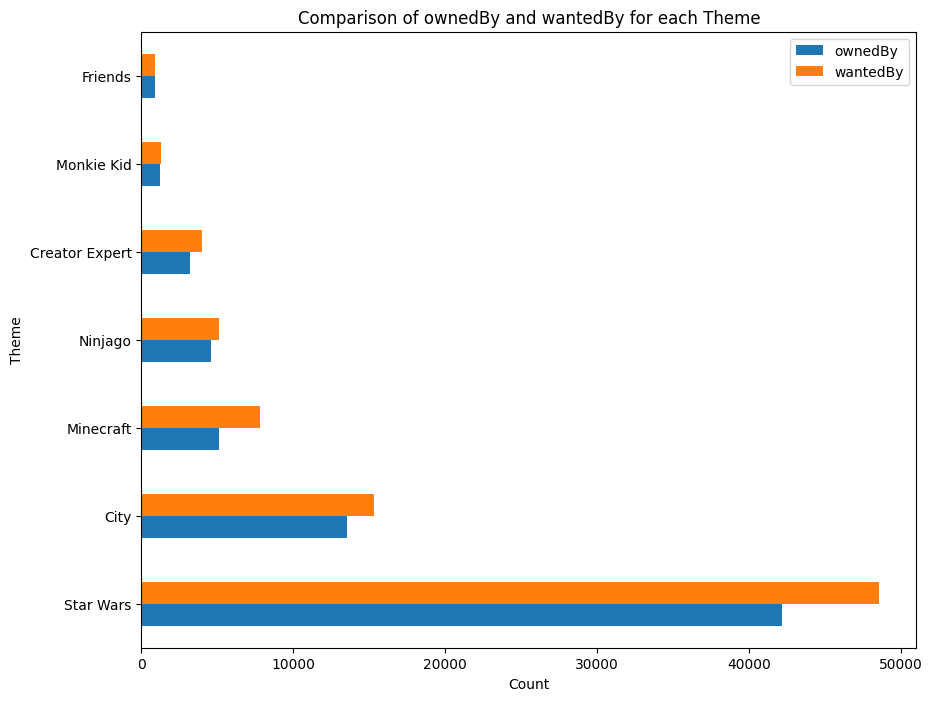

In [7]:
# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('theme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df = grouped_df.sort_values(by=['wantedBy', 'ownedBy'], ascending=False)

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 8))
grouped_df[['ownedBy', 'wantedBy']].plot(kind='barh', ax=ax)

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Theme')
ax.set_title('Comparison of ownedBy and wantedBy for each Theme')

# Show the plot
plt.show()

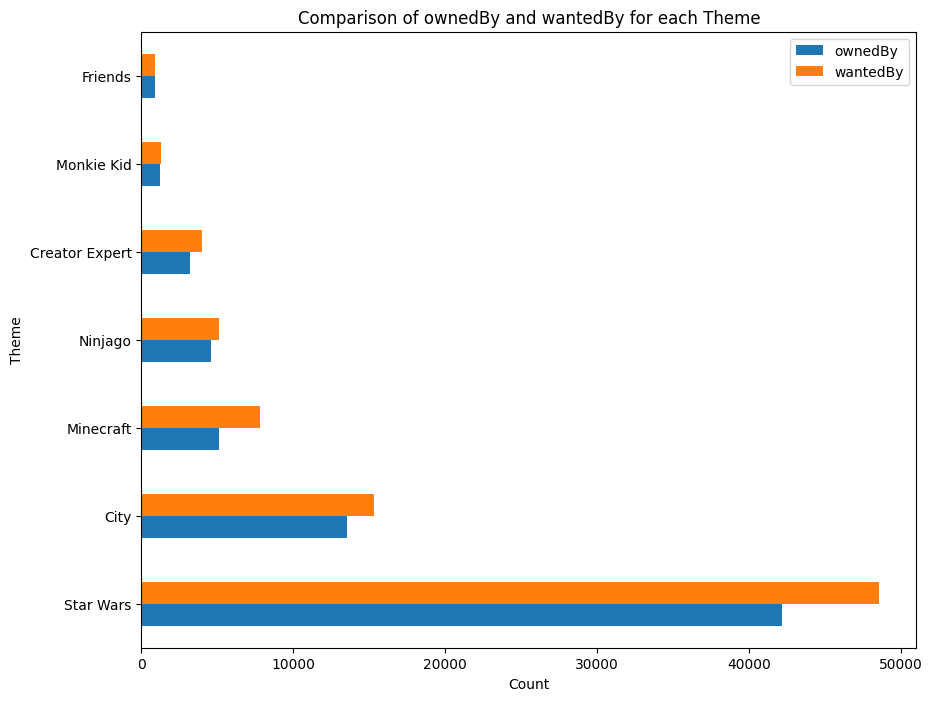

In [8]:
# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('theme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df = grouped_df.sort_values(by=['wantedBy', 'ownedBy'], ascending=False)

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 8))
grouped_df[['ownedBy', 'wantedBy']].plot(kind='barh', ax=ax)

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Theme')
ax.set_title('Comparison of ownedBy and wantedBy for each Theme')

# Show the plot
plt.show()

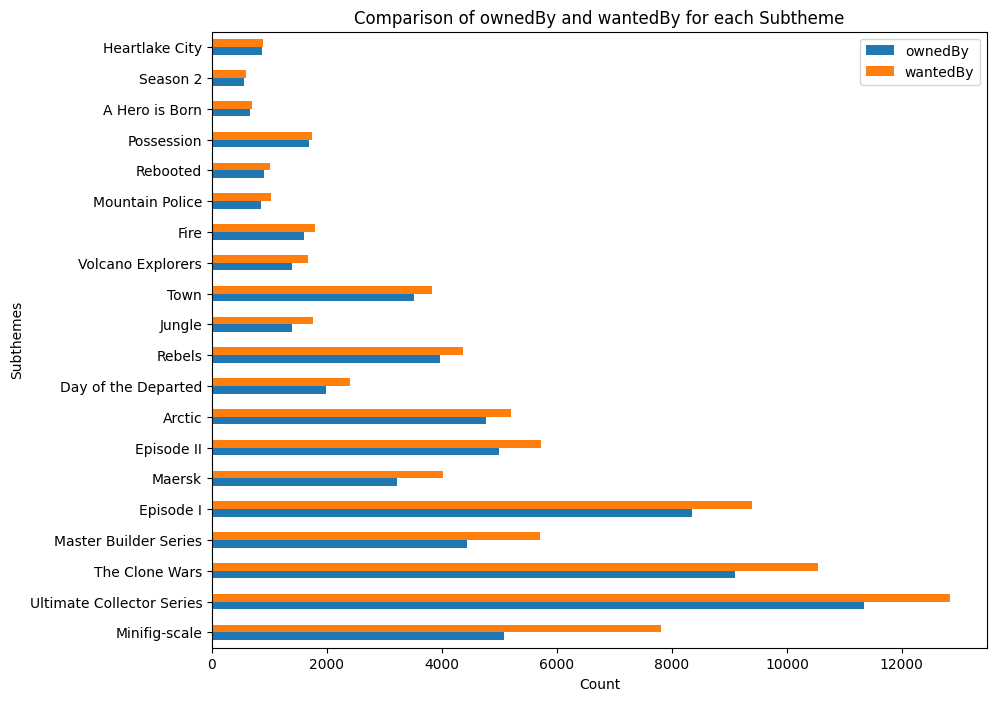

In [9]:
# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('subtheme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df['difference'] = grouped_df['wantedBy'] - grouped_df['ownedBy']
grouped_df = grouped_df.sort_values('difference', ascending=False)

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 8))
grouped_df[['ownedBy', 'wantedBy']].plot(kind='barh', ax=ax)

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Subthemes')
ax.set_title('Comparison of ownedBy and wantedBy for each Subtheme')

# Show the plot
plt.show()

Interactive things


In [10]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral3
from bokeh.transform import dodge

# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('subtheme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df['difference'] = grouped_df['wantedBy'] - grouped_df['ownedBy']
grouped_df = grouped_df.sort_values('difference', ascending=False)

# Reset index to use 'subtheme' in ColumnDataSource
grouped_df = grouped_df.reset_index()

# Create a ColumnDataSource from df
source = ColumnDataSource(grouped_df)

# Create a new figure
p = figure(y_range=grouped_df['subtheme'], height=600, width=800, title='Comparison of ownedBy and wantedBy for each Subtheme')

# Create horizontal bar charts
p.hbar(y=dodge('subtheme', -0.25, range=p.y_range), right='ownedBy', height=0.4, color=Spectral3[0], source=source, legend_label="ownedBy")
p.hbar(y=dodge('subtheme', 0.25, range=p.y_range), right='wantedBy', height=0.4, color=Spectral3[1], source=source, legend_label="wantedBy")

# Add a hover tool
hover = HoverTool(tooltips=[("ownedBy", "@ownedBy"), ("wantedBy", "@wantedBy")])
p.add_tools(hover)

# Move the legend to the upper right corner
p.legend.location = "top_right"

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [11]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import dodge

# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('subtheme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df['difference'] = grouped_df['wantedBy'] - grouped_df['ownedBy']
grouped_df = grouped_df.sort_values('difference', ascending=False)

# Reset index to use 'subtheme' in ColumnDataSource
grouped_df = grouped_df.reset_index()

# Create a ColumnDataSource from df
source = ColumnDataSource(grouped_df)

# Create a new figure
p = figure(y_range=grouped_df['subtheme'], height=600, width=800, title='Comparison of ownedBy and wantedBy for each Subtheme')

# Create horizontal bar charts with specified colors
p.hbar(y=dodge('subtheme', -0.25, range=p.y_range), right='ownedBy', height=0.4, color="#add8e6", source=source, legend_label="ownedBy")  # Light blue
p.hbar(y=dodge('subtheme', 0.25, range=p.y_range), right='wantedBy', height=0.4, color="#ffa07a", source=source, legend_label="wantedBy")  # Light salmon

# Add a hover tool
hover = HoverTool(tooltips=[("ownedBy", "@ownedBy"), ("wantedBy", "@wantedBy")])
p.add_tools(hover)

# Move the legend to the upper right corner
p.legend.location = "top_right"

# Add interactivity to the legend
p.legend.click_policy = "hide"

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

HEAT MAP - REALISED DATES (HOVER)

In [12]:

import calmap


# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a pivot table with 'Date' as index and the count of 'Theme' as values
pivot_df = df.pivot_table(index='Date', aggfunc='count')['subtheme']

# Create a calendar heatmap
plt.figure(figsize=(16,10))
calmap.yearplot(data=pivot_df, year=2018)  # Change the year to the year you want to plot
plt.title('Calendar Heatmap of subtheme')
plt.show()

ModuleNotFoundError: No module named 'calmap'

trial interactive

In [ ]:
from bokeh.io import show
from bokeh.models import (ColumnDataSource, HoverTool, LinearColorMapper,
                          BasicTicker, PrintfTickFormatter, ColorBar)
from bokeh.plotting import figure
from bokeh.transform import transform
from bokeh.palettes import Viridis256
import pandas as pd
import numpy as np
from datetime import datetime

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a pivot table with 'Date' as index and the count of 'Theme' as values
pivot_df = df.pivot_table(index='Date', aggfunc='count')['subtheme']

# Create a new DataFrame with 'day', 'month', 'year', and 'count' columns
df_new = pd.DataFrame({
    'day': pivot_df.index.day,
    'month': pivot_df.index.month,
    'year': pivot_df.index.year,
    'count': pivot_df.values
})

# Filter the DataFrame for the year you want to visualize
year = 2022  # Change this to the year you want to visualize
df_year = df_new[df_new['year'] == year]

# Create a ColumnDataSource from df_year
source = ColumnDataSource(df_year)

# Create a color mapper
color_mapper = LinearColorMapper(palette=Viridis256, low=df_year['count'].min(), high=df_year['count'].max())

# Create a new figure
p = figure(title=f"Calendar Heatmap of Theme for {year}", x_range=(1, 12), y_range=(1, 31),
           x_axis_label='Month', y_axis_label='Day', toolbar_location=None,
           tools="hover", tooltips=[("Count", "@count")])

# Create a rectangle for each day of the year
p.rect(x="month", y="day", width=1, height=1, source=source,
       fill_color=transform('count', color_mapper), line_color=None)

# Add a color bar
color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')

# Show the plot
show(p)

In [ ]:
import numpy as np
from bokeh.io import show
from bokeh.models import (ColumnDataSource, HoverTool, LinearColorMapper,
                          BasicTicker, PrintfTickFormatter, ColorBar, Slider)
from bokeh.plotting import figure
from bokeh.transform import transform
from bokeh.palettes import Viridis256
from bokeh.layouts import column
import panel as pn

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Create a pivot table with 'subtheme', 'Year', and 'Month' as index and the count as values
pivot_df = df.pivot_table(index=['subtheme', 'Year', 'Month'], aggfunc='count', fill_value=0)['theme'].reset_index()

# Create a ColumnDataSource from pivot_df
source = ColumnDataSource(pivot_df)

# Create a color mapper
color_mapper = LinearColorMapper(palette=Viridis256)

# Create a new figure
p = figure(title="Calendar Heatmap of Subtheme", x_range=(1, 12), y_range=list(df['subtheme'].unique()),
           x_axis_label='Month', y_axis_label='Subtheme', toolbar_location=None,
           tools="hover", tooltips=[("Count", "@Theme")])

# Create a rectangle for each month of each subtheme
p.rect(x="Month", y="subtheme", width=1, height=1, source=source,
       fill_color=transform('theme', color_mapper), line_color=None)

# Add a color bar
color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')

# Create a slider to select the year
slider = Slider(start=df['Year'].min(), end=df['Year'].max(), value=df['Year'].min(), step=1, title="Year")

# Update the plot based on the selected year
def update(attr, old, new):
    year = slider.value
    new_data = pivot_df[pivot_df['Year'] == year]
    source.data = ColumnDataSource.from_df(new_data)

slider.on_change('value', update)

# Combine the plot and the slider
layout = column(slider, p)

# Show the plot
pn.panel(layout).show()

Launching server at http://localhost:62055


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Loop through each set in the top 20 set names
for set_name in top_20_set_names:
    set_dft = dft[dft['name'] == set_name]  # filter the DataFrame to include only the rows for this set
    fig.add_trace(go.Scatter(x=set_dft['Date'], y=set_dft['PriceMonthPLN'], mode='lines+markers', name=set_name))

fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have defined top_20_set_names and dft DataFrame somewhere before

# Convert 'Date' column to datetime if it's not already
dft['Date'] = pd.to_datetime(dft['Date'])

fig = go.Figure()

# Loop through each set in the top 20 set names
for set_name in top_20_set_names:
    set_dft = dft[dft['name'] == set_name]  # filter the DataFrame to include only the rows for this set
    set_dft = set_dft.sort_values('Date')  # sort the DataFrame by 'Date'
    fig.add_trace(go.Scatter(x=set_dft['Date'], y=set_dft['PriceMonthPLN'], mode='lines+markers', name=set_name))

# Update x-axis layout to display date in 'Month Year' format
fig.update_layout(xaxis=dict(
    tickformat='%b %Y',  # %b: Abbreviated month name, %Y: 4-digit year
    title='Date'
))

fig.show()


In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20
conversion_rate=0.23
# Assuming you have defined top_20_set_names and dft DataFrame somewhere before

# Convert 'Date' column to datetime if it's not already
dft['Date'] = pd.to_datetime(dft['Date'])

# Create a figure
p = figure(x_axis_type='datetime', title="Interactive Line Plot", width=900, height=600)

# Loop through each set in the top 20 set names
for i, set_name in enumerate(top_20_set_names):
    set_dft = dft[dft['name'] == set_name]  # filter the DataFrame to include only the rows for this set
    set_dft = set_dft.sort_values('Date')  # sort the DataFrame by 'Date'
    
    # Create a ColumnDataSource for each set
    source = ColumnDataSource(data=dict(
        Date=set_dft['Date'],
        PriceMonthPLN=set_dft['PriceMonthPLN']* conversion_rate,
        Name=[set_name] * len(set_dft),
    ))
    
    # Plot the line
    p.line('Date', 'PriceMonthPLN', source=source, legend_label=set_name, line_color=Category20[20][i%20])
    
    # Add circle markers
    p.circle('Date', 'PriceMonthPLN', source=source, size=6, color=Category20[20][i%20], legend_label=set_name)
    
# Add hover tool
hover = HoverTool(tooltips=[("Name", "@Name"), ("Price", "@PriceMonthPLN")])
p.add_tools(hover)

# Customize plot
p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Price"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Click on legend to hide/show lines

# Move legend outside of the plot area
p.legend.orientation = "vertical"
p.legend.border_line_alpha = 1
p.legend.background_fill_alpha = 1

# Adjust the size of the legend
p.legend.label_text_font_size = "10pt"

# Show the plot
show(p)


In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20
import pandas as pd

# Assuming you have defined top_20_set_names and dft DataFrame somewhere before

# Convert 'Date' column to datetime if it's not already
dft['Date'] = pd.to_datetime(dft['Date'])

# Create a figure
p = figure(x_axis_type='datetime', title="Interactive Line Plot", width=900, height=600)

# Loop through each set in the top 20 set names
for i, set_name in enumerate(top_20_set_names):
    set_dft = dft[dft['name'] == set_name]  # filter the DataFrame to include only the rows for this set
    set_dft = set_dft.sort_values('Date')  # sort the DataFrame by 'Date'
    
    # Create a ColumnDataSource for each set
    source = ColumnDataSource(data=dict(
        Date=set_dft['Date'],
        PriceMonthPLN=set_dft['PriceMonthPLN'],  # Using original price in PLN
        Name=[set_name] * len(set_dft),
    ))
    
    # Plot the line
    p.line('Date', 'PriceMonthPLN', source=source, legend_label=set_name, line_color=Category20[20][i%20], visible=False)
    
    # Add circle markers
    p.circle('Date', 'PriceMonthPLN', source=source, size=6, color=Category20[20][i%20], legend_label=set_name, visible=False)
    
# Add hover tool
hover = HoverTool(tooltips=[("Name", "@Name"), ("Price", "@PriceMonthPLN{0.00 zł}")])
p.add_tools(hover)

# Customize plot
p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Price (PLN)"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Click on legend to hide/show lines

# Move legend outside of the plot area
p.legend.orientation = "vertical"
p.legend.border_line_alpha = 1
p.legend.background_fill_alpha = 1

# Adjust the size of the legend
p.legend.label_text_font_size = "10pt"

# Show the plot
show(p)


In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20
import pandas as pd

# Assuming you have defined top_20_set_names and dft DataFrame somewhere before

# Convert 'Date' column to datetime if it's not already
dft['Date'] = pd.to_datetime(dft['Date'])

# Define the conversion rate from PLN to euros
conversion_rate = 0.23

# Create a figure
p = figure(x_axis_type='datetime', title="Select a set to compare prices", width=900, height=600)

# Loop through each set in the top 20 set names
for i, set_name in enumerate(top_20_set_names):
    set_dft = dft[dft['name'] == set_name]  # filter the DataFrame to include only the rows for this set
    set_dft = set_dft.sort_values('Date')  # sort the DataFrame by 'Date'
    
    # Create a ColumnDataSource for each set
    source = ColumnDataSource(data=dict(
        Date=set_dft['Date'],
        PriceMonthEUR=set_dft['PriceMonthPLN'] * conversion_rate,  # Convert price to euros
        Name=[set_name] * len(set_dft),
    ))
    
    # Plot the line
    p.line('Date', 'PriceMonthEUR', source=source, legend_label=set_name, line_color=Category20[20][i%20],visible=False)
    
    # Add circle markers
    p.circle('Date', 'PriceMonthEUR', source=source, size=6, color=Category20[20][i%20], legend_label=set_name,visible=False)
    
# Add hover tool
hover = HoverTool(tooltips=[("Name", "@Name"), ("Price", "@PriceMonthEUR{0.00 €}")])
p.add_tools(hover)

# Customize plot
p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Price (EUR)"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Click on legend to hide/show lines

# Move legend outside of the plot area
p.legend.orientation = "vertical"
p.legend.border_line_alpha = 1
p.legend.background_fill_alpha = 1

# Adjust the size of the legend
p.legend.label_text_font_size = "10pt"

# Show the plot
show(p)

In [ ]:
import plotly.express as px

# Create a DataFrame with the most wanted subthemes
most_wanted_subthemes = df.groupby('subtheme')['wantedBy'].sum().reset_index()

# Merge with the original DataFrame to get the 'DE_retailPrice' and 'name' for each subtheme
merged_df = pd.merge(most_wanted_subthemes, df[['subtheme', 'DE_retailPrice', 'name']], on='subtheme', how='left')

# Create a scatter plot
fig = px.scatter(merged_df, x='name', y='DE_retailPrice', color='wantedBy', title='DE Price vs Name by Most Wanted Subthemes')

fig.show()

In [ ]:
import plotly.express as px

# Create a DataFrame with the most wanted subthemes
most_wanted_subthemes = df.groupby('subtheme')['wantedBy'].sum().reset_index()

# Sort by 'wantedBy' and select the top 15
most_wanted_subthemes = most_wanted_subthemes.sort_values('wantedBy', ascending=False).head(15)

# Merge with the original DataFrame to get the 'DE_retailPrice' and 'name' for each subtheme
merged_df = pd.merge(most_wanted_subthemes, df[['subtheme', 'DE_retailPrice', 'name']], on='subtheme', how='left')

# Create a scatter plot
fig = px.scatter(merged_df, x='name', y='DE_retailPrice', color='wantedBy', title='DE Price vs Name by Most Wanted Subthemes')

fig.show()

In [ ]:
import plotly.express as px

# Create a DataFrame with the most wanted subthemes
most_wanted_subthemes = df.groupby('subtheme')['wantedBy'].sum().reset_index()

# Sort by 'wantedBy' and select the top 15
most_wanted_subthemes = most_wanted_subthemes.sort_values('wantedBy', ascending=False).head(15)

# Merge with the original DataFrame to get the 'DE_retailPrice' and 'name' for each subtheme
merged_df = pd.merge(most_wanted_subthemes, df[['subtheme', 'DE_retailPrice', 'name']], on='subtheme', how='left')

# Create a vertical scatter plot
fig = px.scatter(merged_df, y='name', x='DE_retailPrice', color='wantedBy', title='Name vs DE Price by Most Wanted Subthemes')

fig.show()

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20
import pandas as pd

# Assuming you have defined top_20_set_names and dft DataFrame somewhere before

# Convert 'Date' column to datetime if it's not already
dft['Date'] = pd.to_datetime(dft['Date'])

# Define the conversion rate from PLN to euros
conversion_rate = 0.23

# Create a figure
p = figure(x_axis_type='datetime', title="Select a set to compare prices", width=900, height=600)

# Loop through each set in the top 20 set names
for i, set_name in enumerate(top_20_set_names):
    set_dft = dft[dft['name'] == set_name]  # filter the DataFrame to include only the rows for this set
    set_dft = set_dft.sort_values('Date')  # sort the DataFrame by 'Date'
    
    # Create a ColumnDataSource for each set
    source = ColumnDataSource(data=dict(
        Date=set_dft['Date'],
        PriceMonthEUR=set_dft['PriceMonthPLN'] * conversion_rate,  # Convert price to euros
        StartingPrice=[set_dft['DE_retailPrice'].iloc[0]] * len(set_dft),  # Set the starting price for the line
        Name=[set_name] * len(set_dft),
    ))
    
    # Plot the line
    p.line('Date', 'PriceMonthEUR', source=source, legend_label=set_name, line_color=Category20[20][i%20], visible=False)
    
    # Add circle markers
    p.circle('Date', 'PriceMonthEUR', source=source, size=6, color=Category20[20][i%20], legend_label=set_name, visible=False)
    
# Add hover tool
hover = HoverTool(tooltips=[("Name", "@Name"), ("Price", "@PriceMonthEUR{0.00 €}")])
p.add_tools(hover)

# Customize plot
p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Price (EUR)"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Click on legend to hide/show lines

# Move legend outside of the plot area
p.legend.orientation = "vertical"
p.legend.border_line_alpha = 1
p.legend.background_fill_alpha = 1

# Adjust the size of the legend
p.legend.label_text_font_size = "10pt"

# Show the plot
show(p)


NameError: name 'dft' is not defined